# Sentiment Analysis Walkthrough

This notebook demonstrates a step-by-step sentiment analysis on customer reviews from a sports ecommerce dataset.  
We will:  
- Load raw reviews from SQL Server  
- Clean and preprocess the text  
- Calculate sentiment polarity scores using TextBlob  
- Classify reviews as Positive, Neutral, or Negative  
- Visualise the sentiment distribution  
- Save the processed data for use in dashboards


# Step 1: Import required libraries

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from textblob import TextBlob
import re
import matplotlib.pyplot as plt


## Step 2: Load Customer Reviews from SQL Server

We connect to the SQL Server database and fetch all reviews from the `dbo.customer_reviews` table.


In [2]:
def fetch_data_from_sql():
    conn_str = (
        "mssql+pyodbc://THUSI\\SQLEXPRESS/MarketingAnalytics"
        "?trusted_connection=yes&driver=SQL+Server"
    )
    try:
        engine = create_engine(conn_str)
        print("Connected to SQL Server successfully.")
        query = "SELECT * FROM dbo.customer_reviews"
        df = pd.read_sql(query, engine)
        return df
    except Exception as e:
        print("Connection failed:", e)
        return None

df = fetch_data_from_sql()
if df is not None:
    print(f"Loaded {len(df)} reviews")
    display(df.head())
else:
    print("Failed to load data")


Connected to SQL Server successfully.
Loaded 1363 reviews


,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText
0,1,77,18,2023-12-23,3,"Average experience, nothing special."
1,2,80,19,2024-12-25,5,The quality is top-notch.
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper."
4,5,64,2,2023-07-16,3,"Average experience, nothing special."


## Step 3: Clean and Preprocess Review Text

We clean the review text by:  
- Converting to lowercase  
- Replacing hyphens with spaces  
- Removing punctuation  
- Stripping extra whitespace  
This helps improve sentiment analysis accuracy.


In [3]:
def clean_text(text):
    try:
        text = str(text).lower()
        text = text.replace('-', ' ')
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    except Exception as e:
        print(f"Error cleaning text: {e}")
        return ""

df['cleaned_review'] = df['ReviewText'].fillna('').apply(clean_text)
display(df[['ReviewText', 'cleaned_review']].head())


,ReviewText,cleaned_review
0,"Average experience, nothing special.",average experience nothing special
1,The quality is top-notch.,the quality is top notch
2,Five stars for the quick delivery.,five stars for the quick delivery
3,"Good quality, but could be cheaper.",good quality but could be cheaper
4,"Average experience, nothing special.",average experience nothing special


## Step 4: Calculate Sentiment Scores Using TextBlob

We use TextBlob's sentiment polarity score, which ranges from -1 (negative) to +1 (positive).  
If an error occurs during analysis, we assign a neutral score of 0.


In [4]:
def safe_sentiment_analysis(text):
    try:
        return TextBlob(text).sentiment.polarity
    except Exception as e:
        print(f"Error in sentiment analysis: {e}")
        return 0.0

df['sentiment_score'] = df['cleaned_review'].apply(safe_sentiment_analysis)
display(df[['cleaned_review', 'sentiment_score']].head())


,cleaned_review,sentiment_score
0,average experience nothing special,0.103571
1,the quality is top notch,0.500000
2,five stars for the quick delivery,0.333333
3,good quality but could be cheaper,0.700000
4,average experience nothing special,0.103571


## Step 5: Classify Sentiment Labels

We classify reviews into three categories based on polarity scores:  
- Positive: score > 0.1  
- Negative: score < -0.1  
- Neutral: otherwise


In [5]:
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)
df['sentiment'].value_counts()


sentiment
Positive    1063
Negative     200
Neutral      100
Name: count, dtype: int64

## Step 6: Visualise Sentiment Distribution

Let's see the count of reviews per sentiment category.


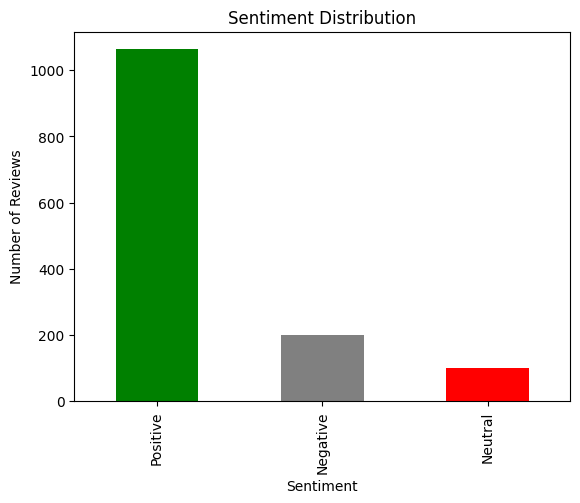

In [6]:
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


## Step 7: Export Results

Save the processed data with sentiment labels to an Excel file for use in Power BI or other dashboards.


In [7]:
output_path = r"D:\GitHub\marketing-analytics-sentiment-sports-ecommerce\data\processed\sentiment_tb_results.xlsx"
df.to_excel(output_path, index=False)
print(f"Sentiment analysis results saved to:\n{output_path}")


Sentiment analysis results saved to:
D:\GitHub\marketing-analytics-sentiment-sports-ecommerce\data\processed\sentiment_tb_results.xlsx


# Summary

In this notebook, we successfully:

- Connected to a SQL Server database and loaded customer reviews  
- Cleaned and preprocessed the review text for analysis  
- Applied TextBlob to calculate sentiment polarity scores  
- Classified each review into **Positive**, **Neutral**, or **Negative** categories  
- Visualised the sentiment distribution across all reviews  
- Exported the sentiment-labelled data for integration into reporting tools

---

### Next Steps

- Perform deeper analysis (e.g., trends by product, time, or customer segments) to uncover behavioural patterns  
- Assess the impact of marketing campaigns on sentiment and customer behaviour  
- Build interactive Power BI dashboards using time intelligence, KPIs, and visual storytelling  
- Translate insights into actionable recommendations for marketing and customer experience teams

